In [1]:
import glob
import re

from matplotlib import pyplot as plt
from utils import Graph
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from collections import OrderedDict

In [2]:
file_tree = {}

top_ionization_list = []

total_means = []
child_means = []

for file in glob.glob('ion-est-non-uni-fields/*.txt'):
    key = int(re.search(r'(\d*)(?:V)', file).group(1))
    if (key in file_tree):
        file_tree[key].append(file)
    else:
        file_tree[key] = [file]

The below plots total and estimated ionizations, where the first comes from the full, recursive algorithm and the second comes from raising $2$ to each simulation's primary ionizations. The printed values show different ways of estimating the total number of ionizations from the estimated number.

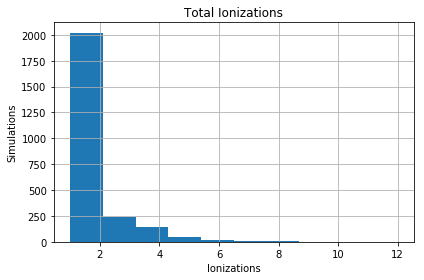

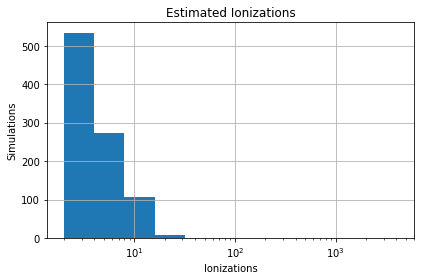

Actual M: 2.7252 sum(2^k)/N: 3.792 Log-Normal Mean: 3.5806055919682502 2^(mean(N)): 2.9805942628205457


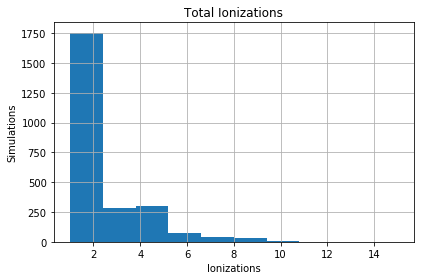

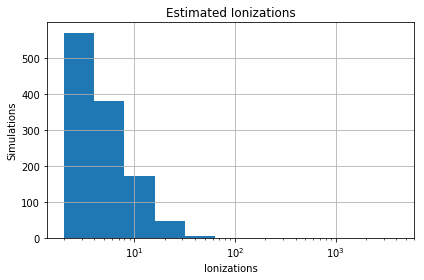

Actual M: 3.1808 sum(2^k)/N: 5.0728 Log-Normal Mean: 4.6631595643262065 2^(mean(N)): 3.5465099618299027


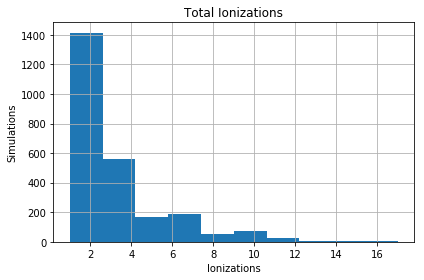

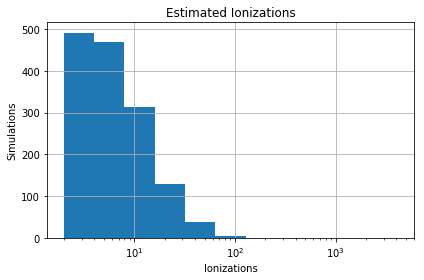

Actual M: 3.9524 sum(2^k)/N: 7.9608 Log-Normal Mean: 7.274131479538532 2^(mean(N)): 4.718734498696641


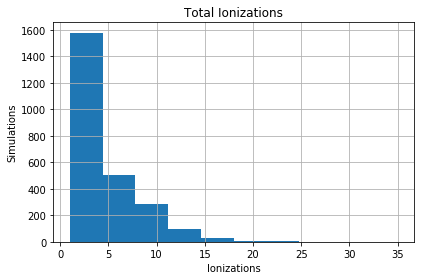

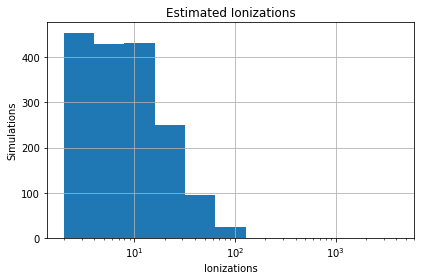

Actual M: 5.2084 sum(2^k)/N: 12.5072 Log-Normal Mean: 11.725262120455723 2^(mean(N)): 6.474640094455863


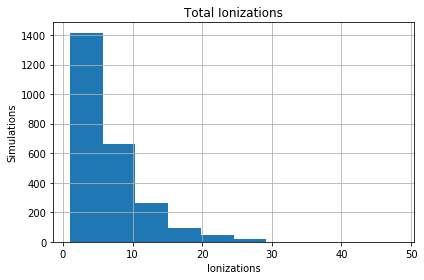

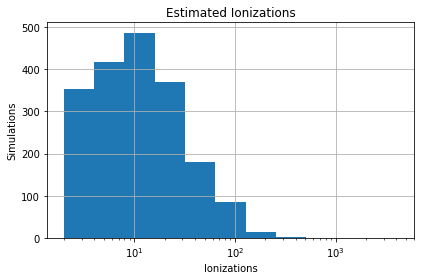

Actual M: 7.0176 sum(2^k)/N: 21.3504 Log-Normal Mean: 20.716996757020553 2^(mean(N)): 9.622421523109447


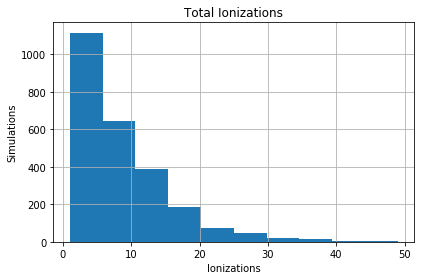

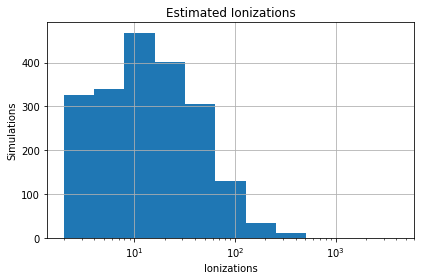

Actual M: 9.0996 sum(2^k)/N: 30.3968 Log-Normal Mean: 31.034579904148533 2^(mean(N)): 12.654687708081324


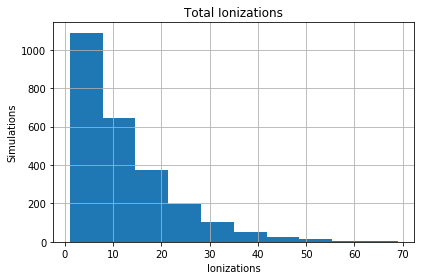

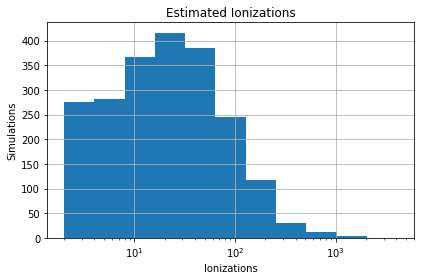

Actual M: 12.6356 sum(2^k)/N: 59.1208 Log-Normal Mean: 61.70760896564623 2^(mean(N)): 19.5568213890703


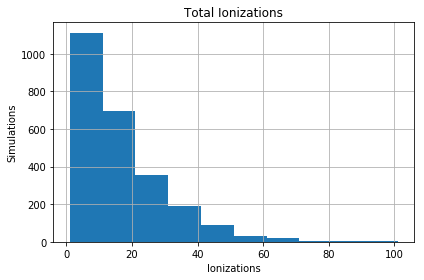

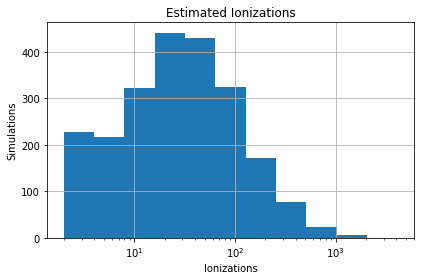

Actual M: 16.65 sum(2^k)/N: 85.036 Log-Normal Mean: 95.98605757478663 2^(mean(N)): 28.482423464079883


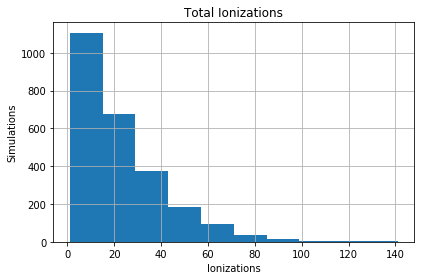

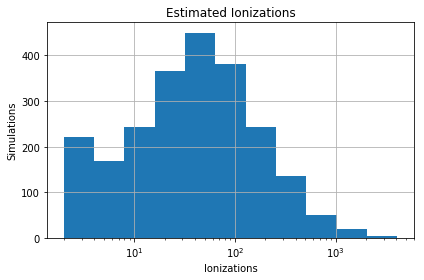

Actual M: 22.718 sum(2^k)/N: 141.0544 Log-Normal Mean: 163.39715616766293 2^(mean(N)): 39.83597553222944


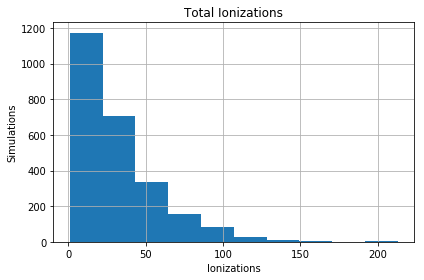

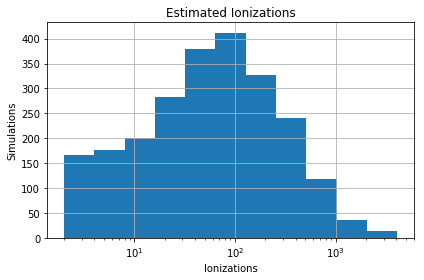

Actual M: 31.95 sum(2^k)/N: 226.7312 Log-Normal Mean: 297.6573439341595 2^(mean(N)): 62.80467290671066


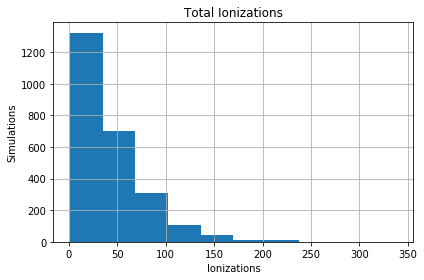

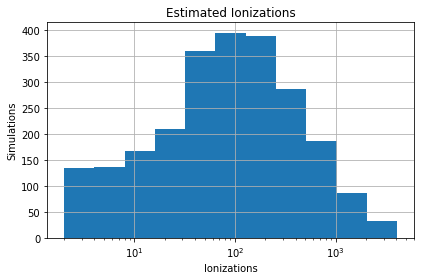

Actual M: 42.6532 sum(2^k)/N: 348.1872 Log-Normal Mean: 495.0375194838228 2^(mean(N)): 92.84806893372316


In [3]:
for key, value in sorted(file_tree.items()):
    child_ion_list = []
    total_ion_list = []
    
    for file in value:
        _t, _x, _y, _z, _ke, _drift, _ionized, _child_ions = np.loadtxt(file, delimiter=',', unpack=True, ndmin=1)
        child_ion_list.append(_child_ions[-1])
        total_ion_list.append(_ionized[-1])
        
    child_ion_list = np.array([k + 1 for k in child_ion_list])
    total_ion_list = np.array([k + 1 for k in total_ion_list])
    
    child_means.append(np.mean(child_ion_list))
    total_means.append(np.mean(total_ion_list))

    mu = np.mean(np.log(2) * child_ion_list)
    var = np.var(np.log(2) * child_ion_list)
    
    # plt.rcParams['font.size'] = 14
    # plt.rcParams['font.family'] = 'serif'
    # fig = plt.figure(figsize=(6, 6))
    
    plt.hist(total_ion_list, rwidth=1.0, histtype='stepfilled')
    
    plt.title('Total Ionizations')
    plt.xlabel('Ionizations')
    plt.ylabel('Simulations')
    
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    # plt.savefig(f'total_ion_dist_{key}.pdf', bbox_inches='tight')
    
    # plt.rcParams['font.size'] = 14
    # plt.rcParams['font.family'] = 'serif'
    # fig = plt.figure(figsize=(6, 6))
    
    plt.hist(2**np.array([k - 1 for k in child_ion_list]), bins=[2**k for k in np.arange(1, 13, 1)], rwidth=1.0, histtype='stepfilled')

    plt.title('Estimated Ionizations')
    plt.xlabel('Ionizations')
    plt.ylabel('Simulations')
    
    plt.xscale('log')
    
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    # plt.savefig(f'est_ion_dist_{key}.pdf', bbox_inches='tight')
    
    print('Actual M:', sum([k + 1 for k in total_ion_list]) / 2500, 'sum(2^k)/N:', sum(2**child_ion_list) / 2500, 'Log-Normal Mean:', np.exp(mu + 0.5 * var), '2^(mean(N)):', 2**np.mean(child_ion_list))

The below shows an example of altering the $2^\bar{N}$ estimation. Whether the fit of this modification is specific to this particular configuration is unknown.

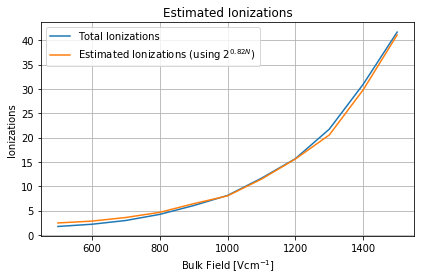

In [4]:
# plt.rcParams['font.size'] = 14
# plt.rcParams['font.family'] = 'serif'
# fig = plt.figure(figsize=(12, 6))

volt_vals = np.arange(500, 1600, 100)

plt.plot(volt_vals, total_means, label='Total Ionizations')

plt.title('Estimated Ionizations')
plt.xlabel('Bulk Field [Vcm$^{-1}$]')
plt.ylabel('Ionizations')

plt.plot(volt_vals, 2**(np.array(child_means) * 0.82), label='Estimated Ionizations (using $2^{0.82N}$)')

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# plt.savefig(f'fitted_ion_est.pdf', bbox_inches='tight')